In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
import pandas as pd
data = pd.read_csv('StudentsPerformance.csv')

In [4]:
# Print the shape of the dataset
count_of_person = data.shape[0]
print("Total number of people:",count_of_person)

Total number of students: 1000


In [6]:
# Add a column for the average score
data.rename(columns={
    "gender": "Gender",
    "race/ethnicity": "Race/Ethnicity",
    "parental level of education": "Parental Education Level",
    "lunch": "Lunch Type",
    "test preparation course": "Test Preparation Course",
    "math score": "Math Score",
    "reading score": "Reading Score",
    "writing score": "Writing Score"
}, inplace=True)

# Add a column for the average score
data['Average Score'] = (data['Math Score'] + data['Reading Score'] + data['Writing Score']) / 3

In [7]:
# Create a new column for the average score
df=data
df.head()

,Gender,Race/Ethnicity,Parental Education Level,Lunch Type,Test Preparation Course,Math Score,Reading Score,Writing Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


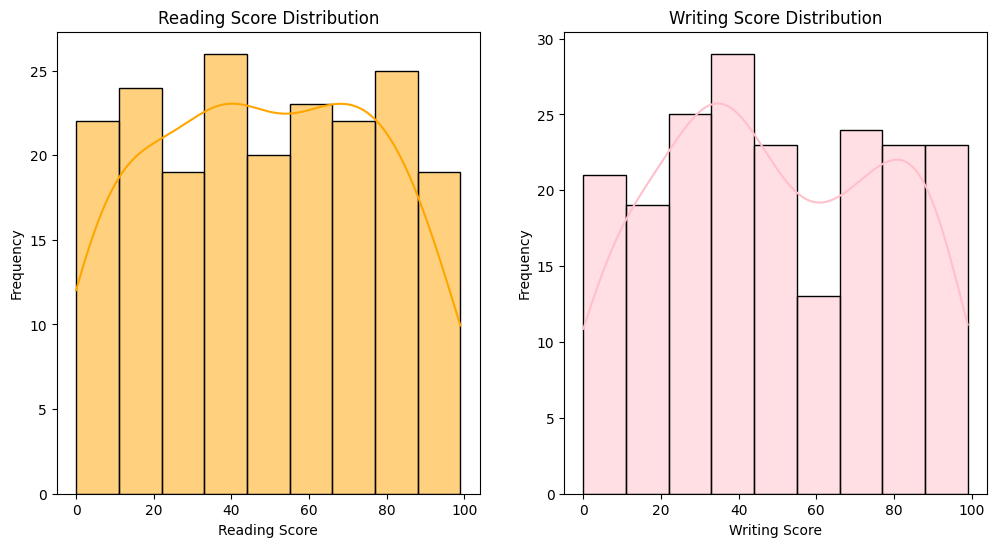

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Generating a sample dataset for demonstration
np.random.seed(0)
data = pd.DataFrame({
    'reading score': np.random.randint(0, 100, 200),
    'writing score': np.random.randint(0, 100, 200)
})

# Plot the distribution of 'reading score' and 'writing score'
plt.figure(figsize=(12, 6))

# Plotting the distribution of 'reading score'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(data['reading score'], kde=True, color='orange')
plt.title('Reading Score Distribution')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

# Plotting the distribution of 'writing score'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(data['writing score'], kde=True, color='pink')
plt.title('Writing Score Distribution')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.show()

In [ ]:
# Calculating the average score
data['Average Score'] = data[['Math Score', 'Reading Score', 'Writing Score']].mean(axis=1)

# Example analysis: Plotting the distribution of the average score
plt.figure(figsize=(8, 6))
sns.histplot(data['Average Score'], kde=True, color='purple')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()
print(data.columns)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming 'data' is a DataFrame with the required columns
X = data[['Reading Score', 'Writing Score']]  
y = data['Math Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.01)  # alpha controls the strength of regularization

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Examine the coefficients to see which features are important
coefficients = lasso_model.coef_
print("Coefficients:", coefficients)

# Convert coefficients to a DataFrame
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Plot a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=coefficients_df, palette='viridis')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()